In [1]:
#casting : changing the type
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

d = pd.read_csv('PBL grab ride price - Sheet1 (1).csv')

In [2]:
d

,Date (Day/Month),Date (Day/Week),Time,Duration (min),Distance (km),The location of depature,Destination,Weather,Price (RM)
0,12/11,Wednesday,15:15,5,1.22,UTMy,Mid Valley Mega Mall,Clear,6
1,12/11,Wednesday,15:16,18,8.24,UTMy,Sunway Pyramid Mall,Clear,13.3
2,12/11,Wednesday,15:18,18,6.84,UTMy,KLCC Twin Towers,Clear,16
3,12/11,Wednesday,15:18,17,5.70,UTMy,1 Mont Kiara,Clear,13.3
4,12/11,Wednesday,15:28,15,5.35,UTMy,Lalaport Bukit Bintang,Clear,13
...,...,...,...,...,...,...,...,...,...
735,30/12,Tuesday,16:06,60,40.00,UTMy,KLIA,Thunder,75
736,30/12,Tuesday,16:07,23,6.89,UTMy,1 Utama Shopping mall,Thunder,37
737,30/12,Tuesday,16:07,6,0.86,UTMy,Laurel Residence,Thunder,14
738,30/12,Tuesday,16:07,22,11.00,UTMy,Taylor's University,Thunder,36


In [3]:
d['Time'] = pd.to_datetime(d['Time'], format='%H:%M')
d['Hour'] = d['Time'].dt.hour


In [4]:
d_encoded = pd.get_dummies(
    d,
    columns=['Date (Day/Week)', 'Weather', 'The location of depature', 'Destination'],
    drop_first=True
)


In [5]:
y = d_encoded['Price (RM)']

X = d_encoded.drop(columns=[
    'Price (RM)',                  # ← 絶対に除外
    'Date (Day/Month)',            # 分析に不要
    'Time',                        # Hourに変換済み
    'Duration (min)'  # 数値版を使う
])




In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
d['Weather'] = (
    d['Weather']
    .astype(str)
    .str.strip()      # 前後の空白を削除
    .str.capitalize() # Clear / Rain / Thunder に統一
)


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MAE: 5.141473653552044
R²: 0.8771738475690077


In [10]:
coeff_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df


,Variable,Coefficient
13,Weather_Thunder,19.281303
12,Weather_Thunder,17.725219
5,Date (Day/Week)_Sunday,5.746012
20,Destination_KLCC Twin Towers,5.058912
9,Date (Day/Week)_Wednesday,4.866486
8,Date (Day/Week)_Wednesday,3.938622
23,Destination_Lalaport Bukit Bintang,2.867138
11,Weather_Rain,2.237958
6,Date (Day/Week)_Thursday,2.170012
16,Destination_1 Utama Shopping mall,1.970625


In [11]:
coeff_d_range = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff_df


,Variable,Coefficient
13,Weather_Thunder,19.281303
12,Weather_Thunder,17.725219
5,Date (Day/Week)_Sunday,5.746012
20,Destination_KLCC Twin Towers,5.058912
9,Date (Day/Week)_Wednesday,4.866486
8,Date (Day/Week)_Wednesday,3.938622
23,Destination_Lalaport Bukit Bintang,2.867138
11,Weather_Rain,2.237958
6,Date (Day/Week)_Thursday,2.170012
16,Destination_1 Utama Shopping mall,1.970625


In [12]:
d['Price (RM)'].dtype



dtype('O')

In [13]:
d['Price (RM)'].unique()


array(['6', '13.3', '16', '13', '65', '14', '34', '21.3', '10.3', '15.3',
       '82.3', '27.3', '12.3', '26.3', '41.3', '11.33', '21.63', '25.75',
       '18.54', '18', '65.5', '19', '8.3', '22', '33', '24', '71', '5',
       '11', '20', '5.3', '12', '8', '41', '29', '75', '36', '48', '15',
       '31', '82', '35', '30', '43', '35.3', '43.3', '33.3', '34.3',
       '75.3', '58.3', '19.3', '9.3', '24.3', '22.3', '23.3', '36.3', '9',
       '21', '66', '17', '26', '32', '46', '14.3', '6.3', '16.3', '25.3',
       '37.3', '20.3', '73.3', '18.3', '7.3', '7', '32.3', '47', '73',
       '23', '28', '37', '10', '25', '40', '44', '45', '55', '63', '65.3',
       '27', '17.3', '２９', '52', '67', '49', '50', '70', '72', '38',
       '71.3', '28.3', '60', '42', '4', '69', '39', '68', '79', '54'],
      dtype=object)

In [14]:
d['Price (RM)'] = (
    d['Price (RM)']
    .astype(str)
    .str.replace('RM', '', regex=False)
    .str.strip()
)



In [15]:
d['Price (RM)'] = pd.to_numeric(
    d['Price (RM)'],
    errors='coerce'
)


In [16]:
d['Price (RM)'].dtype


dtype('float64')

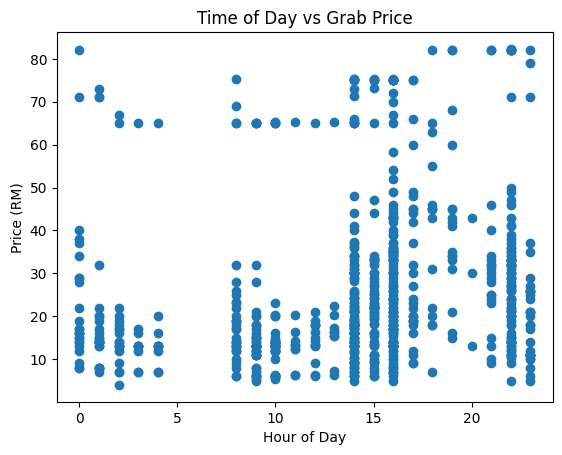

In [17]:
plt.scatter(d['Hour'], d['Price (RM)'])
plt.xlabel('Hour of Day')
plt.ylabel('Price (RM)')
plt.title('Time of Day vs Grab Price')
plt.show()


In [18]:
klcc_data = d[d['Destination'] == 'KLCC Twin Towers']

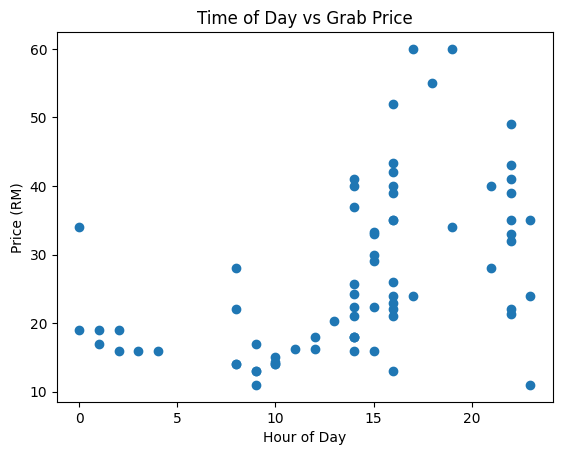

In [19]:
plt.scatter(klcc_data['Hour'], klcc_data['Price (RM)'])
plt.xlabel('Hour of Day')
plt.ylabel('Price (RM)')
plt.title('Time of Day vs Grab Price')
plt.show()


In [20]:
klcc_data['Distance (km)'].dtype
klcc_data['Duration (min)'].dtype


dtype('int64')

In [21]:
d['Weather'].unique()


array(['Clear', 'Thunder', 'Rain'], dtype=object)

In [22]:
d['Weather'].unique()

array(['Clear', 'Thunder', 'Rain'], dtype=object)

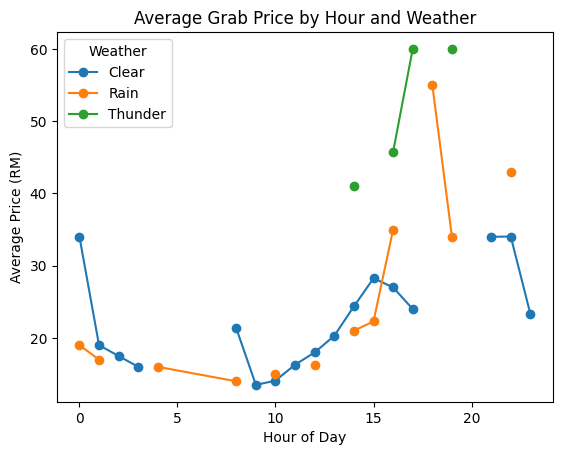

In [23]:
avg_price = (
    klcc_data
    .groupby(['Hour', 'Weather'])['Price (RM)']
    .mean()
    .unstack()
)

avg_price.plot(marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price (RM)')
plt.title('Average Grab Price by Hour and Weather')
plt.show()


In [24]:
rainy_data_klcc = d[
    (d["Destination"] == "KLCC Twin Towers") &
    (d["Weather"] == "Rain")
]

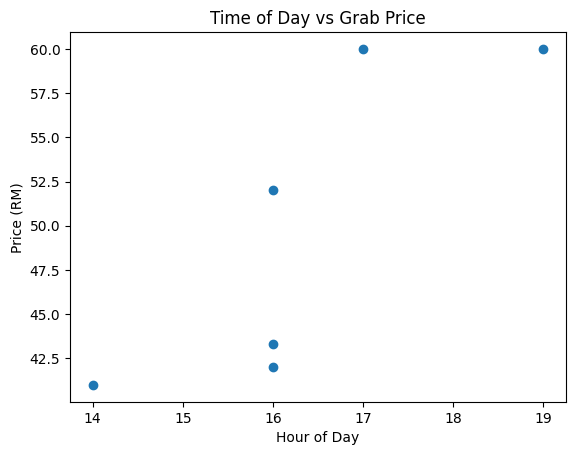

In [25]:
Thunder_data_klcc = d[
    (d["Destination"] == "KLCC Twin Towers") &
    (d["Weather"] == "Thunder")
]

plt.scatter(Thunder_data_klcc['Hour'], Thunder_data_klcc['Price (RM)'])
plt.xlabel('Hour of Day')
plt.ylabel('Price (RM)')
plt.title('Time of Day vs Grab Price')
plt.show()

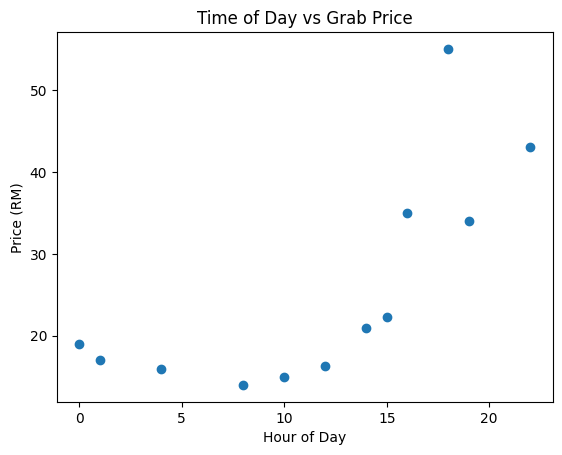

In [26]:
plt.scatter(rainy_data_klcc['Hour'], rainy_data_klcc['Price (RM)'])
plt.xlabel('Hour of Day')
plt.ylabel('Price (RM)')
plt.title('Time of Day vs Grab Price')
plt.show()

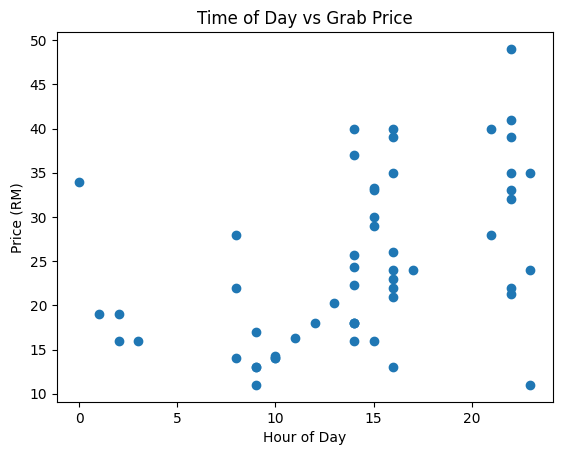

In [27]:
Clear_data_klcc = d[
    (d["Destination"] == "KLCC Twin Towers") &
    (d["Weather"] == "Clear")
]

plt.scatter(Clear_data_klcc['Hour'], Clear_data_klcc['Price (RM)'])
plt.xlabel('Hour of Day')
plt.ylabel('Price (RM)')
plt.title('Time of Day vs Grab Price')
plt.show()

In [28]:
klcc_data['Hour'] = klcc_data['Hour'].astype(int)


/tmp/ipython-input-1987080566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klcc_data['Hour'] = klcc_data['Hour'].astype(int)


In [29]:
klcc_data = pd.get_dummies(
    klcc_data,
    columns=['Weather'],
    drop_first=True
)


In [30]:
klcc_data = pd.get_dummies(
    klcc_data,
    columns=['Date (Day/Week)'],
    drop_first=True
)


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Hourだけ多項式化
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_hour = poly.fit_transform(X_train[['Hour']])
X_test_hour = poly.transform(X_test[['Hour']])


In [32]:
import numpy as np

X_train_final = np.hstack([
    X_train_hour,
    X_train.drop(columns=['Hour']).values
])

X_test_final = np.hstack([
    X_test_hour,
    X_test.drop(columns=['Hour']).values
])


In [33]:
model = LinearRegression()
model.fit(X_train_final, y_train)

y_pred = model.predict(X_test_final)

from sklearn.metrics import r2_score

print("R²:", r2_score(y_test, y_pred))


R²: 0.8832290931781845


In [34]:
feature_names = (
    poly.get_feature_names_out(['Hour']).tolist()
    + X.drop(columns=['Hour']).columns.tolist()
)

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)


                               Feature   Coefficient
14                    Weather_Thunder   1.950774e+01
13                     Weather_Thunder  1.799457e+01
21        Destination_KLCC Twin Towers  7.418557e+00
24  Destination_Lalaport Bukit Bintang  5.210457e+00
10          Date (Day/Week)_Wednesday   4.851752e+00
6               Date (Day/Week)_Sunday  4.516947e+00
15            Destination_1 Mont Kiara  4.425923e+00
17   Destination_1 Utama Shopping mall  4.200805e+00
9            Date (Day/Week)_Wednesday  3.712176e+00
19       Destination_Batu Caves Temple  3.578254e+00
12                        Weather_Rain  2.092886e+00
2                        Distance (km)  1.581285e+00
30     Destination_Sunway Pyramid Mall  1.555451e+00
7             Date (Day/Week)_Thursday  1.391031e+00
20                    Destination_KLCC  1.197335e+00
27              Destination_Mid Valley  1.084158e+00
22                    Destination_KLIA  9.359633e-01
8              Date (Day/Week)_Tuesday  7.3870

In [35]:
def predict_price(hour, weather, day):
    data = {
        'Hour': [hour],
        'Weather_Rain': [1 if weather == 'Rain' else 0],
        'Weather_Thunder': [1 if weather == 'Thunder' else 0],
        'Day_Tuesday': [1 if day == 'Tuesday' else 0],
        'Day_Wednesday': [1 if day == 'Wednesday' else 0],
        'Day_Thursday': [1 if day == 'Thursday' else 0],
        'Day_Friday': [1 if day == 'Friday' else 0],
        'Day_Saturday': [1 if day == 'Saturday' else 0],
        'Day_Sunday': [1 if day == 'Sunday' else 0],
    }

    df = pd.DataFrame(data)

    hour_poly = poly.transform(df[['Hour']])
    X_final = np.hstack([hour_poly, df.drop(columns=['Hour']).values])

    return model.predict(X_final)[0]


In [36]:
[d for d in klcc_data.columns if d.startswith('Date (Day/Week)_')]


['Date (Day/Week)_Monday',
 'Date (Day/Week)_Saturday',
 'Date (Day/Week)_Sunday',
 'Date (Day/Week)_Thursday',
 'Date (Day/Week)_Tuesday',
 'Date (Day/Week)_Wednesday',
 'Date (Day/Week)_Wednesday ']

In [37]:
X = klcc_data[
    ['Hour',
     'Weather_Rain', 'Weather_Thunder',
     'Date (Day/Week)_Tuesday', 'Date (Day/Week)_Wednesday', 'Date (Day/Week)_Thursday',
     'Date (Day/Week)_Saturday', 'Date (Day/Week)_Sunday']
]

y = klcc_data['Price (RM)']


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R²: -0.17537685635167377
MSE: 104.22113600344545


In [39]:
# ① Hour の2乗を作る
klcc_data['Hour_sq'] = klcc_data['Hour'] ** 2

# ② X と y を定義
X = klcc_data[
    [
        'Hour',
        'Hour_sq',
        'Weather_Rain',
        'Weather_Thunder',
        'Date (Day/Week)_Monday',
        'Date (Day/Week)_Tuesday',
        'Date (Day/Week)_Wednesday',
        'Date (Day/Week)_Thursday',
        'Date (Day/Week)_Saturday',
        'Date (Day/Week)_Sunday'
    ]
]

y = klcc_data['Price (RM)']


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)


R²: -0.18168286364725872
RMSE: 10.236224508711594


In [41]:
coef = pd.Series(model.coef_, index=X.columns)
coef.sort_values()


,0
Date (Day/Week)_Monday,-7.607848
Hour_sq,-0.003823
Date (Day/Week)_Thursday,0.041091
Hour,1.146585
Date (Day/Week)_Saturday,2.390006
Date (Day/Week)_Tuesday,2.538621
Date (Day/Week)_Wednesday,3.903641
Weather_Rain,4.019804
Date (Day/Week)_Sunday,7.212109
Weather_Thunder,28.733439


In [42]:
print(klcc_data.columns)

klcc_data.columns = klcc_data.columns.str.strip()

print(klcc_data.columns)

Index(['Date (Day/Month)', 'Time', 'Duration (min)', 'Distance (km)',
       'The location of depature', 'Destination', 'Price (RM)', 'Hour',
       'Weather_Rain', 'Weather_Thunder', 'Date (Day/Week)_Monday',
       'Date (Day/Week)_Saturday', 'Date (Day/Week)_Sunday',
       'Date (Day/Week)_Thursday', 'Date (Day/Week)_Tuesday',
       'Date (Day/Week)_Wednesday', 'Date (Day/Week)_Wednesday ', 'Hour_sq'],
      dtype='object')
Index(['Date (Day/Month)', 'Time', 'Duration (min)', 'Distance (km)',
       'The location of depature', 'Destination', 'Price (RM)', 'Hour',
       'Weather_Rain', 'Weather_Thunder', 'Date (Day/Week)_Monday',
       'Date (Day/Week)_Saturday', 'Date (Day/Week)_Sunday',
       'Date (Day/Week)_Thursday', 'Date (Day/Week)_Tuesday',
       'Date (Day/Week)_Wednesday', 'Date (Day/Week)_Wednesday', 'Hour_sq'],
      dtype='object')


In [43]:
cols = list(klcc_data.columns)
for c in cols:
    print(c)


Date (Day/Month)
Time
Duration (min)
Distance (km)
The location of depature
Destination
Price (RM)
Hour
Weather_Rain
Weather_Thunder
Date (Day/Week)_Monday
Date (Day/Week)_Saturday
Date (Day/Week)_Sunday
Date (Day/Week)_Thursday
Date (Day/Week)_Tuesday
Date (Day/Week)_Wednesday
Date (Day/Week)_Wednesday
Hour_sq


In [44]:
print(X.shape)
print(len(model.coef_))



(73, 10)
10


In [45]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_
}).sort_values(by="coefficient", ascending=False)

coef_df


,feature,coefficient
3,Weather_Thunder,28.733439
9,Date (Day/Week)_Sunday,7.212109
2,Weather_Rain,4.019804
6,Date (Day/Week)_Wednesday,3.903641
5,Date (Day/Week)_Tuesday,2.538621
8,Date (Day/Week)_Saturday,2.390006
0,Hour,1.146585
7,Date (Day/Week)_Thursday,0.041091
1,Hour_sq,-0.003823
4,Date (Day/Week)_Monday,-7.607848


In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred) ** 0.5)


R²: -2.022950143360916
RMSE: 16.372116490908244


In [47]:
print(X.dtypes)


Hour                         int64
Hour_sq                      int64
Weather_Rain                  bool
Weather_Thunder               bool
Date (Day/Week)_Monday        bool
Date (Day/Week)_Tuesday       bool
Date (Day/Week)_Wednesday     bool
Date (Day/Week)_Thursday      bool
Date (Day/Week)_Saturday      bool
Date (Day/Week)_Sunday        bool
dtype: object


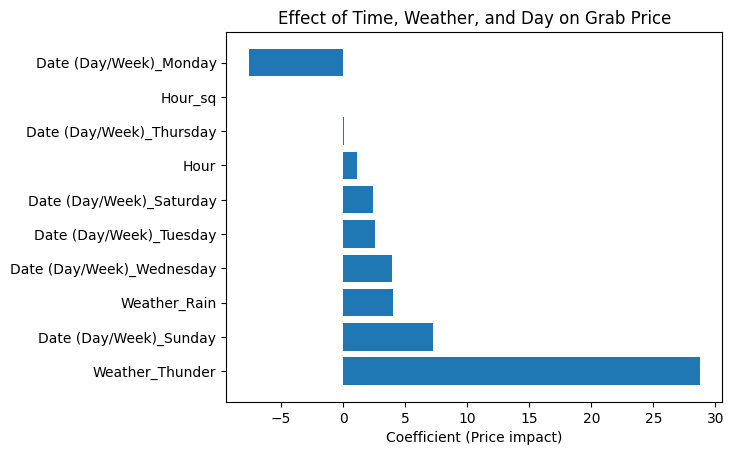

In [48]:
import matplotlib.pyplot as plt

plt.figure()
plt.barh(coef_df["feature"], coef_df["coefficient"])
plt.xlabel("Coefficient (Price impact)")
plt.title("Effect of Time, Weather, and Day on Grab Price")
plt.show()


In [49]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = Pipeline([
    ("poly", PolynomialFeatures(
        degree=2,
        interaction_only=True,
        include_bias=False
    )),
    ("ridge", Ridge(alpha=10))  # ← 超重要
])

poly_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('ridge', Ridge(alpha=10))])

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

from sklearn.metrics import r2_score
print("R2:", r2_score(y_test, y_pred))



RMSE: 16.372116490908244
R2: -2.022950143360916


In [51]:
d["Hour_sq"] = d["Hour"] ** 2
d["Hour_cu"] = d["Hour"] ** 3


In [52]:
d_model = pd.get_dummies(
    d,
    columns=["Weather", "Date (Day/Week)"],
    drop_first=True
)


In [53]:
X = d_model.drop(
    columns=[
        "Price",
        "Date (Day/Month)",
        "Destination",
        "The location of depature", # ← これ
    ],
    errors="ignore"
)



In [54]:
print(X.dtypes)


Time                          datetime64[ns]
Duration (min)                         int64
Distance (km)                        float64
Price (RM)                           float64
Hour                                   int32
Hour_sq                                int32
Hour_cu                                int32
Weather_Rain                            bool
Weather_Thunder                         bool
Date (Day/Week)_Moday                   bool
Date (Day/Week)_Monday                  bool
Date (Day/Week)_Saturday                bool
Date (Day/Week)_Sunday                  bool
Date (Day/Week)_Thursday                bool
Date (Day/Week)_Tuesday                 bool
Date (Day/Week)_Wednesday               bool
Date (Day/Week)_Wednesday               bool
dtype: object


In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Redefine X and y to ensure only numerical features are included
X = klcc_data[
    [
        'Hour',
        'Hour_sq',
        'Distance (km)', # Add Distance (km) as it is numerical
        'Duration (min)', # Add Duration (min) as it is numerical
        'Weather_Rain',
        'Weather_Thunder',
        'Date (Day/Week)_Monday',
        'Date (Day/Week)_Tuesday',
        'Date (Day/Week)_Wednesday',
        'Date (Day/Week)_Thursday',
        'Date (Day/Week)_Saturday',
        'Date (Day/Week)_Sunday'
    ]
].copy() # Use .copy() to avoid SettingWithCopyWarning

y = klcc_data["Price (RM)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Ridge(alpha=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)

RMSE: 8.290523182354827
R2: 0.22485096901375434


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge", Ridge(alpha=10))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)


RMSE: 6.104576169181537
R2: 0.5797261520717272


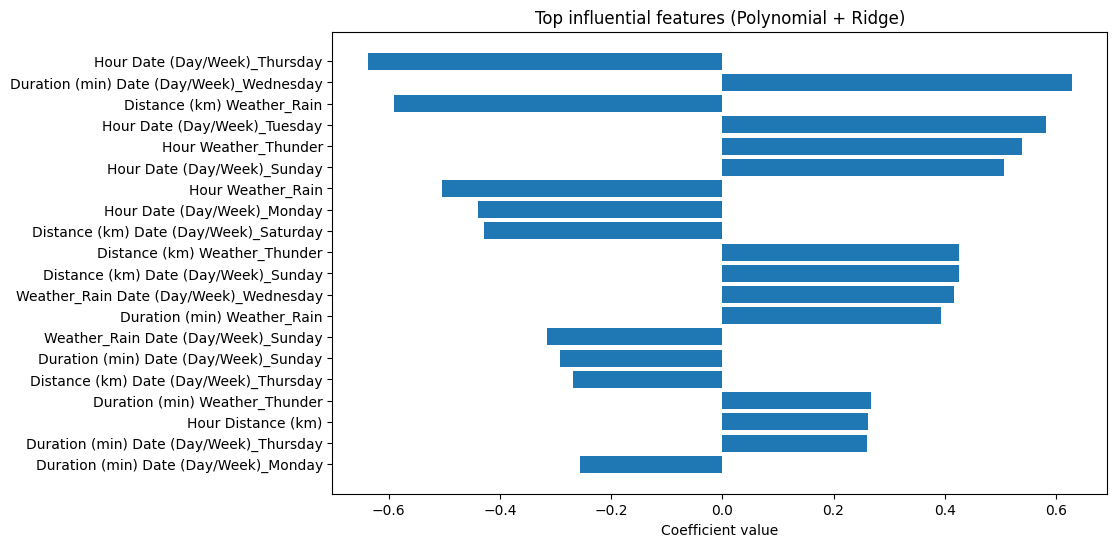

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# パイプラインから取り出す
poly = model.named_steps["poly"]
ridge = model.named_steps["ridge"]

# 特徴量名（Polynomial後）
feature_names = poly.get_feature_names_out(X.columns)

# 係数
coefs = ridge.coef_

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs,
    "abs_coef": np.abs(coefs)
})

# 重要度順に並び替え
coef_df = coef_df.sort_values("abs_coef", ascending=False)

top_n = 20
top_features = coef_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_features["feature"], top_features["coef"])
plt.gca().invert_yaxis()
plt.xlabel("Coefficient value")
plt.title("Top influential features (Polynomial + Ridge)")
plt.show()


In [58]:
utmy_data = d[d["The location of depature"] == "UTMy"].copy()
print(utmy_data.shape)
utmy_data.head()


(740, 12)


,Date (Day/Month),Date (Day/Week),Time,Duration (min),Distance (km),The location of depature,Destination,Weather,Price (RM),Hour,Hour_sq,Hour_cu
0,12/11,Wednesday,1900-01-01 15:15:00,5,1.22,UTMy,Mid Valley Mega Mall,Clear,6.0,15,225,3375
1,12/11,Wednesday,1900-01-01 15:16:00,18,8.24,UTMy,Sunway Pyramid Mall,Clear,13.3,15,225,3375
2,12/11,Wednesday,1900-01-01 15:18:00,18,6.84,UTMy,KLCC Twin Towers,Clear,16.0,15,225,3375
3,12/11,Wednesday,1900-01-01 15:18:00,17,5.70,UTMy,1 Mont Kiara,Clear,13.3,15,225,3375
4,12/11,Wednesday,1900-01-01 15:28:00,15,5.35,UTMy,Lalaport Bukit Bintang,Clear,13.0,15,225,3375


In [59]:
utmy_data["Hour"] = pd.to_datetime(
    utmy_data["Time"], format="%H:%M"
).dt.hour


In [60]:
utmy_data = pd.get_dummies(
    utmy_data,
    columns=["Date (Day/Week)"],
    drop_first=True
)


In [61]:
utmy_data = pd.get_dummies(
    utmy_data,
    columns=["Weather"],
    drop_first=True
)


In [62]:
utmy_data = pd.get_dummies(
    utmy_data,
    columns=["Destination"],
    drop_first=True
)


In [63]:
feature_cols = [
    "Hour",
    "Weather_Rain",
    "Weather_Thunder",

    "Date (Day/Week)_Monday",
    "Date (Day/Week)_Tuesday",
    "Date (Day/Week)_Wednesday",
    "Date (Day/Week)_Thursday",
    "Date (Day/Week)_Saturday",
    "Date (Day/Week)_Sunday",

    "Destination_KLCC Twin Towers",
    "Destination_KLIA",
    "Destination_Mid Valley Mega Mall",
    "Destination_Batu Caves Temple",
    "Destination_Lalaport Bukit Bintang",
    "Destination_Sunway Pyramid Mall",
    "Destination_1 Mont Kiara",
    "Destination_Laurel Residence",
    "Destination_Taylor's University",
    "Destination_1 Utama Shopping mall"

]


In [64]:
print([c for c in feature_cols if c not in utmy_data.columns])


[]


In [65]:
X = utmy_data[feature_cols].copy()
y = utmy_data["Price (RM)"]

# Drop rows where 'Price (RM)' is NaN
df_cleaned = pd.DataFrame(X).copy()
df_cleaned['Price (RM)'] = y
df_cleaned = df_cleaned.dropna(subset=['Price (RM)'])
X = df_cleaned.drop(columns=['Price (RM)'])
y = df_cleaned['Price (RM)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge", Ridge(alpha=10))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2:", r2)

RMSE: 5.994639302404717
R2: 0.906379721230435


In [66]:
feature_names = model.named_steps["poly"].get_feature_names_out(X.columns)
coefficients = model.named_steps["ridge"].coef_
intercept = model.named_steps["ridge"].intercept_

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("Intercept:", intercept)
coef_df


Intercept: 18.62722664618949


,Feature,Coefficient
164,Destination_KLIA^2,15.103129
10,Destination_KLIA,15.103129
42,Weather_Rain Date (Day/Week)_Wednesday,5.643699
95,Date (Day/Week)_Tuesday Destination_KLIA,4.887080
66,Weather_Thunder Destination_Batu Caves Temple,3.886741
...,...,...
201,Destination_1 Mont Kiara Destination_Taylor's ...,0.000000
204,Destination_Laurel Residence Destination_Taylo...,0.000000
202,Destination_1 Mont Kiara Destination_1 Utama S...,0.000000
205,Destination_Laurel Residence Destination_1 Uta...,0.000000


In [67]:
def predict_price(
    destination_short_name,
    hour,
    day_of_week,
    rain=False,
    thunder=False
):
    # This mapping should ideally be defined globally or passed as an argument
    destination_mapping = {
        "KLCC": "KLCC Twin Towers",
        "Mid Valley": "Mid Valley Mega Mall",
        "Sunway": "Sunway Pyramid Mall",
        "1 Utama": "1 Utama Shopping mall",
        "1 Mont Kiara": "1 Mont Kiara",
        "Lalaport": "Lalaport Bukit Bintang",
        "Batu Caves": "Batu Caves Temple",
        "Laurel": "Laurel Residence",
        "Taylor's": "Taylor's University",
        "KLIA": "KLIA"
    }

    # Initialize a DataFrame with zeros for all expected features
    # Ensure feature_cols is accessible (it's a global variable from previous cell)
    X_new = pd.DataFrame(0, index=[0], columns=feature_cols)

    # Set Hour
    X_new.loc[0, "Hour"] = hour

    # Set Weather
    if rain:
        X_new.loc[0, "Weather_Rain"] = 1
    if thunder:
        X_new.loc[0, "Weather_Thunder"] = 1

    # Set Day of Week
    day_col_name = f"Date (Day/Week)_{day_of_week}"
    if day_col_name in X_new.columns:
        X_new.loc[0, day_col_name] = 1
    # If day_of_week is 'Friday', this column won't exist in X_new,
    # so it will remain 0, which is the correct behavior for the reference category.

    # Set Destination
    full_destination_name = destination_mapping.get(destination_short_name, destination_short_name)
    dest_col_name = f"Destination_{full_destination_name}"
    if dest_col_name in X_new.columns:
        X_new.loc[0, dest_col_name] = 1
    else:
        # If the mapped destination is still not found, it means it's an unrecognized destination
        # For this model, no base destination exists, all are dummy variables.
        print(f"Warning: Destination '{destination_short_name}' (mapped to '{full_destination_name}') not found as a feature in the model. This prediction might be inaccurate.")

    # The pipeline will handle PolynomialFeatures and Ridge internally
    price = model.predict(X_new)[0]

    return round(price, 2)

In [68]:
predict_price(
    destination_short_name="KLIA",
    hour=18,
    day_of_week="Friday",
    rain=True,
    thunder=False
)

np.float64(79.58)

In [69]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

app = FastAPI()

# Save the model and feature_cols before loading them
# Assuming `model` and `feature_cols` are already defined and trained/populated in previous cells.
# If not, ensure they are correctly assigned before this cell runs.
joblib.dump(model, "price_model.pkl")
joblib.dump(feature_cols, "feature_cols.pkl")

# 学習済みモデルを読み込む
model = joblib.load("price_model.pkl")
feature_cols = joblib.load("feature_cols.pkl")

class PredictRequest(BaseModel):
    hour: int
    weather_rain: bool
    weather_thunder: bool
    day: str
    destination: str

@app.post("/predict")
def predict_price(req: PredictRequest):
    # 1行の入力データを作る
    X = dict.fromkeys(feature_cols, 0)

    X["Hour"] = req.hour
    X["Weather_Rain"] = req.weather_rain
    X["Weather_Thunder"] = req.weather_thunder

    day_col = f"Date (Day/Week)_{req.day}"
    if day_col in X:
        X[day_col] = 1

    dest_col = f"Destination_{req.destination}"
    if dest_col in X:
        X[dest_col] = 1

    X_arr = np.array([X[c] for c in feature_cols]).reshape(1, -1)

    price = model.predict(X_arr)[0]

    return {"predicted_price": round(float(price), 2)}

In [70]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

app = FastAPI()

model = joblib.load("price_model.pkl")
feature_cols = joblib.load("feature_cols.pkl")

class PredictRequest(BaseModel):
    hour: int
    weather_rain: bool
    weather_thunder: bool
    day: str
    destination: str

@app.post("/predict")
def predict_price(req: PredictRequest):
    X = dict.fromkeys(feature_cols, 0)

    X["Hour"] = req.hour
    X["Weather_Rain"] = req.weather_rain
    X["Weather_Thunder"] = req.weather_thunder

    day_col = f"Date (Day/Week)_{req.day}"
    if day_col in X:
        X[day_col] = 1

    dest_col = f"Destination_{req.destination}"
    if dest_col in X:
        X[dest_col] = 1

    X_arr = np.array([X[c] for c in feature_cols]).reshape(1, -1)
    price = model.predict(X_arr)[0]

    return {"predicted_price": round(float(price), 2)}


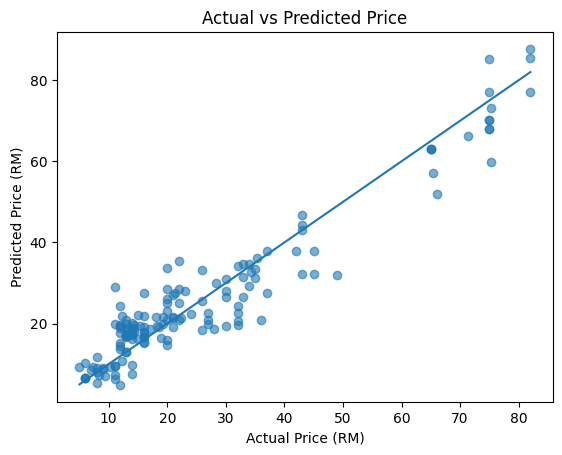

In [71]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure()
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Actual Price (RM)")
plt.ylabel("Predicted Price (RM)")
plt.title("Actual vs Predicted Price")
plt.show()


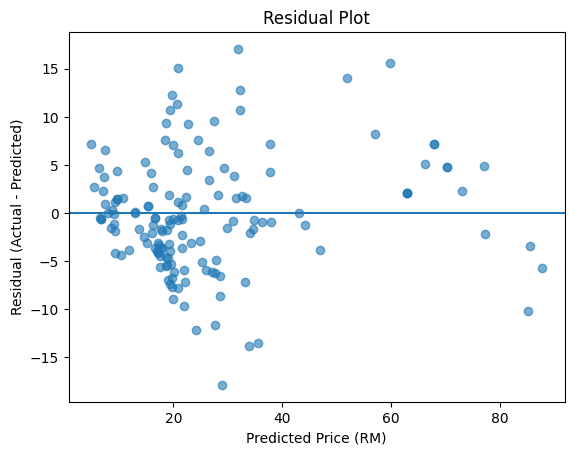

In [72]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0)
plt.xlabel("Predicted Price (RM)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


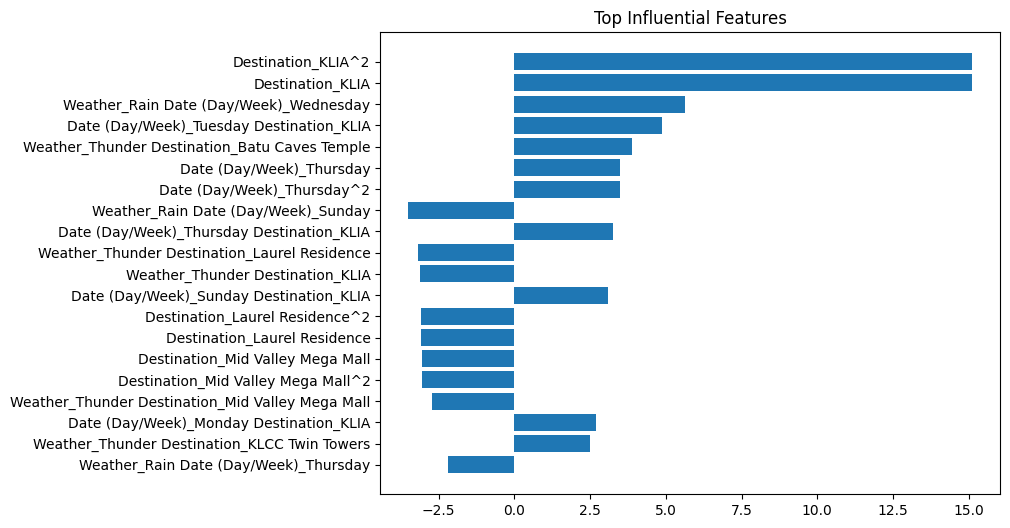

In [73]:
feature_names = model.named_steps["poly"].get_feature_names_out(X.columns)
coefs = model.named_steps["ridge"].coef_

coef_df = (
    pd.DataFrame({
        "feature": feature_names,
        "coef": coefs
    })
    .assign(abs_coef=lambda df: df["coef"].abs())
    .sort_values("abs_coef", ascending=False)
)

coef_df.head(20)
plt.figure(figsize=(8,6))
plt.barh(
    coef_df.head(20)["feature"],
    coef_df.head(20)["coef"]
)
plt.gca().invert_yaxis()
plt.title("Top Influential Features")
plt.show()


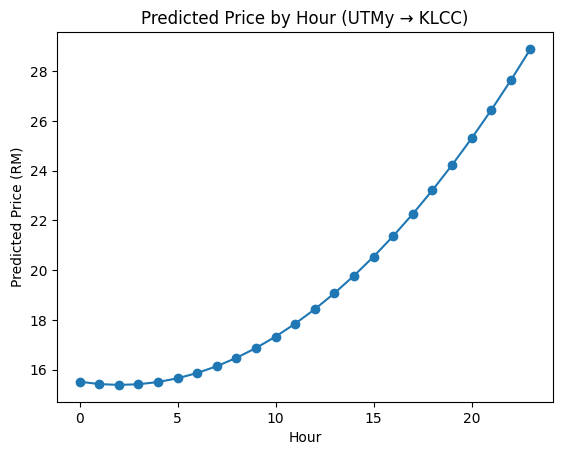

In [74]:
import numpy as np

def make_input(hour, weather_rain=0):
    row = X.iloc[0].copy()
    row[:] = 0

    row["Hour"] = hour
    row["Weather_Rain"] = weather_rain
    row["Date (Day/Week)_Monday"] = 1
    row["Destination_KLCC Twin Towers"] = 1 # Corrected feature name

    return row

hours = range(0, 24)
prices = [
    model.predict(pd.DataFrame([make_input(h)]))[0]
    for h in hours
]

plt.figure()
plt.plot(hours, prices, marker="o")
plt.xlabel("Hour")
plt.ylabel("Predicted Price (RM)")
plt.title("Predicted Price by Hour (UTMy → KLCC)")
plt.show()